##### Copyright 2019 The TensorFlow Authors.


In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# CSV 데이터 로드하기

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/tutorials/load_data/csv"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/tutorials/load_data/csv.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행하기</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/load_data/csv.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 소스 보기</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/tutorials/load_data/csv.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드하기</a></td>
</table>

이 튜토리얼은 TensorFlow에서 CSV 데이터를 사용하는 방법에 대한 예제를 제공합니다.

다음과 같이 두 가지 주요 내용이 있습니다.

1. **Loading the data off disk**
2. **Pre-processing it into a form suitable for training.**

이 튜토리얼은 로딩에 중점을 두며 전처리에 대한 몇 가지 빠른 예를 제공합니다. 전처리 측면에 대해 자세히 알아보려면 [전처리 레이어 작업](https://www.tensorflow.org/guide/keras/preprocessing_layers) 가이드 및 [Keras 전처리 레이어를 사용하여 구조화된 데이터 분류](../structured_data/preprocessing_layers.ipynb) 튜토리얼을 확인하세요.


## 설정하기

In [2]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

2022-12-14 21:07:04.071551: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 21:07:04.071675: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-14 21:07:04.071686: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


## 인메모리 데이터

작은 크기의 CSV 데이터세트를 사용하여 TensorFlow 모델을 훈련시키는 가장 간단한 방법은 이를 메모리에 pandas Dataframe 또는 NumPy 배열로 로드하는 것입니다.


비교적 간단한 예는 [전복 데이터세트](https://archive.ics.uci.edu/ml/datasets/abalone)입니다.

- 데이터세트의 크기가 작습니다.
- 모든 입력 특성은 모두 제한된 범위의 부동 소수점 값입니다.

다음은 [Pandas `DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)에 데이터를 다운로드하는 방법입니다.

In [3]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


이 데이터세트에는 바다 고등류의 일종인 [전복](https://en.wikipedia.org/wiki/Abalone) 측정값 세트가 포함되어 있습니다.

![an abalone shell](https://tensorflow.org/images/abalone_shell.jpg)

[“전복 껍질”](https://www.flickr.com/photos/thenickster/16641048623/) ([Nicki Dugan Pogue](https://www.flickr.com/photos/thenickster/) 제공, CC BY-SA 2.0)


이 데이터 세트의 명목상 작업은 다른 측정값으로부터 나이를 예측하는 것이므로 다음과 같이 훈련을 위해 특성과 레이블을 분리합니다.


In [4]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

이 데이터세트에서는 모든 특성을 동일하게 취급합니다. 다음과 같이 특성을 단일 NumPy 배열로 묶습니다.

In [5]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

다음으로, 회귀 모델로 나이를 예측합니다. 입력 텐서가 하나만 있으므로 여기에서는 `keras.Sequential` 모델이면 충분합니다.

In [6]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

해당 모델을 훈련하려면 특성과 레이블을 `Model.fit`로 전달합니다.

In [7]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10


  1/104 [..............................] - ETA: 2:14 - loss: 93.1127

 24/104 [=====>........................] - ETA: 0s - loss: 109.7707 

 49/104 [=============>................] - ETA: 0s - loss: 97.8226 

 73/104 [====================>.........] - ETA: 0s - loss: 87.7201

 97/104 [==========================>...] - ETA: 0s - loss: 76.3915

104/104 [==============================] - 2s 2ms/step - loss: 73.6423


Epoch 2/10


  1/104 [..............................] - ETA: 0s - loss: 29.1383

 26/104 [======>.......................] - ETA: 0s - loss: 22.3848

 50/104 [=============>................] - ETA: 0s - loss: 18.3118

 73/104 [====================>.........] - ETA: 0s - loss: 15.4082

 97/104 [==========================>...] - ETA: 0s - loss: 14.0302

104/104 [==============================] - 0s 2ms/step - loss: 13.6555


Epoch 3/10


  1/104 [..............................] - ETA: 0s - loss: 4.6509

 26/104 [======>.......................] - ETA: 0s - loss: 9.3496

 51/104 [=============>................] - ETA: 0s - loss: 8.6804

 76/104 [====================>.........] - ETA: 0s - loss: 8.6793

101/104 [============================>.] - ETA: 0s - loss: 8.5348

104/104 [==============================] - 0s 2ms/step - loss: 8.5453


Epoch 4/10


  1/104 [..............................] - ETA: 0s - loss: 13.5137

 25/104 [======>.......................] - ETA: 0s - loss: 8.5626 

 50/104 [=============>................] - ETA: 0s - loss: 8.1565

 75/104 [====================>.........] - ETA: 0s - loss: 8.3381

100/104 [===========================>..] - ETA: 0s - loss: 8.1647

104/104 [==============================] - 0s 2ms/step - loss: 8.0819


Epoch 5/10


  1/104 [..............................] - ETA: 0s - loss: 5.4423

 25/104 [======>.......................] - ETA: 0s - loss: 7.5483

 49/104 [=============>................] - ETA: 0s - loss: 7.8818

 73/104 [====================>.........] - ETA: 0s - loss: 7.7514

 97/104 [==========================>...] - ETA: 0s - loss: 7.7699

104/104 [==============================] - 0s 2ms/step - loss: 7.6597


Epoch 6/10


  1/104 [..............................] - ETA: 0s - loss: 4.7200

 26/104 [======>.......................] - ETA: 0s - loss: 7.0763

 50/104 [=============>................] - ETA: 0s - loss: 7.3246

 73/104 [====================>.........] - ETA: 0s - loss: 7.3244

 96/104 [==========================>...] - ETA: 0s - loss: 7.3536

104/104 [==============================] - 0s 2ms/step - loss: 7.3031


Epoch 7/10


  1/104 [..............................] - ETA: 0s - loss: 6.5185

 25/104 [======>.......................] - ETA: 0s - loss: 6.8842

 49/104 [=============>................] - ETA: 0s - loss: 6.6916

 74/104 [====================>.........] - ETA: 0s - loss: 6.8969

 98/104 [===========================>..] - ETA: 0s - loss: 7.0554

104/104 [==============================] - 0s 2ms/step - loss: 7.0281


Epoch 8/10


  1/104 [..............................] - ETA: 0s - loss: 10.4254

 26/104 [======>.......................] - ETA: 0s - loss: 6.9310 

 50/104 [=============>................] - ETA: 0s - loss: 6.8337

 74/104 [====================>.........] - ETA: 0s - loss: 7.0151

 99/104 [===========================>..] - ETA: 0s - loss: 6.9158

104/104 [==============================] - 0s 2ms/step - loss: 6.8179


Epoch 9/10


  1/104 [..............................] - ETA: 0s - loss: 7.6630

 25/104 [======>.......................] - ETA: 0s - loss: 7.5286

 49/104 [=============>................] - ETA: 0s - loss: 7.1790

 73/104 [====================>.........] - ETA: 0s - loss: 6.7329

 97/104 [==========================>...] - ETA: 0s - loss: 6.6448

104/104 [==============================] - 0s 2ms/step - loss: 6.6587


Epoch 10/10


  1/104 [..............................] - ETA: 0s - loss: 5.5434

 26/104 [======>.......................] - ETA: 0s - loss: 6.6050

 51/104 [=============>................] - ETA: 0s - loss: 6.9054

 75/104 [====================>.........] - ETA: 0s - loss: 6.6799

 99/104 [===========================>..] - ETA: 0s - loss: 6.5964

104/104 [==============================] - 0s 2ms/step - loss: 6.5618


지금까지 CSV 데이터를 사용하여 모델을 훈련하는 가장 기본적인 방법을 보았습니다. 다음으로 숫자 열을 정규화하기 위해 전처리를 적용하는 방법을 배웁니다.

## 기본 전처리

모델에 대한 입력을 정규화하면 좋습니다. Keras 전처리 레이어는 이 정규화를 모델에 빌드하는 편리한 방법을 제공합니다.

`tf.keras.layers.Normalization` 레이어는 각 열의 평균과 분산을 미리 계산하고 이를 사용하여 데이터를 정규화합니다.

먼저 레이어를 만듭니다.

In [8]:
normalize = layers.Normalization()

그런 다음 `Normalization.adapt` 메서드를 사용하여 정규화 레이어를 데이터에 맞게 조정합니다.

참고: `PreprocessingLayer.adapt` 메서드와 함께 훈련 데이터만 사용하고 검증 또는 테스트 데이터는 사용하지 마세요.

In [9]:
normalize.adapt(abalone_features)

그런 다음 모델에서 정규화 레이어를 사용합니다.

In [10]:
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10


  1/104 [..............................] - ETA: 1:14 - loss: 83.3195

 23/104 [=====>........................] - ETA: 0s - loss: 107.1227 

 46/104 [============>.................] - ETA: 0s - loss: 100.7359

 69/104 [==================>...........] - ETA: 0s - loss: 97.4894 

 92/104 [=========================>....] - ETA: 0s - loss: 94.2089

104/104 [==============================] - 1s 2ms/step - loss: 92.5604


Epoch 2/10


  1/104 [..............................] - ETA: 0s - loss: 77.3618

 24/104 [=====>........................] - ETA: 0s - loss: 68.4570

 48/104 [============>.................] - ETA: 0s - loss: 64.9630

 71/104 [===================>..........] - ETA: 0s - loss: 60.6215

 94/104 [==========================>...] - ETA: 0s - loss: 55.9687

104/104 [==============================] - 0s 2ms/step - loss: 53.8474


Epoch 3/10


  1/104 [..............................] - ETA: 0s - loss: 33.5274

 25/104 [======>.......................] - ETA: 0s - loss: 27.4030

 49/104 [=============>................] - ETA: 0s - loss: 23.7669

 73/104 [====================>.........] - ETA: 0s - loss: 20.4905

 96/104 [==========================>...] - ETA: 0s - loss: 17.7557

104/104 [==============================] - 0s 2ms/step - loss: 17.0539


Epoch 4/10


  1/104 [..............................] - ETA: 0s - loss: 6.0965

 24/104 [=====>........................] - ETA: 0s - loss: 7.2913

 47/104 [============>.................] - ETA: 0s - loss: 6.2434

 71/104 [===================>..........] - ETA: 0s - loss: 6.1060

 94/104 [==========================>...] - ETA: 0s - loss: 6.0415

104/104 [==============================] - 0s 2ms/step - loss: 5.9795


Epoch 5/10


  1/104 [..............................] - ETA: 0s - loss: 6.2070

 25/104 [======>.......................] - ETA: 0s - loss: 5.3811

 49/104 [=============>................] - ETA: 0s - loss: 5.2210

 72/104 [===================>..........] - ETA: 0s - loss: 5.3657

 96/104 [==========================>...] - ETA: 0s - loss: 5.0429

104/104 [==============================] - 0s 2ms/step - loss: 5.0962


Epoch 6/10


  1/104 [..............................] - ETA: 0s - loss: 2.9896

 25/104 [======>.......................] - ETA: 0s - loss: 5.7223

 48/104 [============>.................] - ETA: 0s - loss: 5.3740

 72/104 [===================>..........] - ETA: 0s - loss: 5.0233

 96/104 [==========================>...] - ETA: 0s - loss: 5.0526

104/104 [==============================] - 0s 2ms/step - loss: 5.0296


Epoch 7/10


  1/104 [..............................] - ETA: 0s - loss: 4.0672

 25/104 [======>.......................] - ETA: 0s - loss: 4.5018

 49/104 [=============>................] - ETA: 0s - loss: 5.0191

 72/104 [===================>..........] - ETA: 0s - loss: 5.0742

 96/104 [==========================>...] - ETA: 0s - loss: 5.0585

104/104 [==============================] - 0s 2ms/step - loss: 4.9844


Epoch 8/10


  1/104 [..............................] - ETA: 0s - loss: 8.0486

 25/104 [======>.......................] - ETA: 0s - loss: 5.0970

 49/104 [=============>................] - ETA: 0s - loss: 5.1916

 73/104 [====================>.........] - ETA: 0s - loss: 4.9701

 98/104 [===========================>..] - ETA: 0s - loss: 5.0033

104/104 [==============================] - 0s 2ms/step - loss: 4.9694


Epoch 9/10


  1/104 [..............................] - ETA: 0s - loss: 9.3212

 24/104 [=====>........................] - ETA: 0s - loss: 4.9169

 48/104 [============>.................] - ETA: 0s - loss: 4.7689

 72/104 [===================>..........] - ETA: 0s - loss: 4.9059

 95/104 [==========================>...] - ETA: 0s - loss: 4.9345

104/104 [==============================] - 0s 2ms/step - loss: 4.9474


Epoch 10/10


  1/104 [..............................] - ETA: 0s - loss: 4.1141

 24/104 [=====>........................] - ETA: 0s - loss: 4.1990

 48/104 [============>.................] - ETA: 0s - loss: 4.3876

 72/104 [===================>..........] - ETA: 0s - loss: 4.7943

 96/104 [==========================>...] - ETA: 0s - loss: 4.8873

104/104 [==============================] - 0s 2ms/step - loss: 4.9429


## 혼합 데이터 유형

The "Titanic" dataset contains information about the passengers on the Titanic. The nominal task on this dataset is to predict who survived.

![The Titanic](images/csv/Titanic.jpg)

Image [from Wikimedia](https://commons.wikimedia.org/wiki/File:RMS_Titanic_3.jpg)

The raw data can easily be loaded as a Pandas `DataFrame`, but is not immediately usable as input to a TensorFlow model.


In [11]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [12]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

데이터 유형과 범위가 다르기 때문에 단순히 특성을 NumPy 배열에 쌓아서 `keras.Sequential` 모델로 전달할 수 없습니다. 각 열을 개별적으로 처리해야 합니다.

한 가지 옵션으로 데이터를 오프라인으로 전처리(원하는 도구 사용)하여 범주형 열을 숫자 열로 변환한 다음 처리된 출력을 TensorFlow 모델에 전달할 수 있습니다. 이 접근 방식의 단점은 모델을 저장하고 내보내는 경우 전처리가 함께 저장되지 않는다는 것입니다. Keras 전처리 레이어는 모델의 일부이기 때문에 이 문제를 피할 수 있습니다.


이 예제에서는 [Keras 함수형 API](https://www.tensorflow.org/guide/keras/functional)를 사용하여 전처리 로직을 구현하는 모델을 빌드합니다. [하위 클래스화](https://www.tensorflow.org/guide/keras/custom_layers_and_models)하여 같은 작업을 수행할 수도 있습니다.

함수형 API는 "기호화된" 텐서에서 작동합니다. 정상적인 "즉시(eager)" 텐서에는 값이 있습니다. 대조적으로 이러한 "기호화된" 텐서에는 값이 없습니다. 대신에 실행되는 작업을 추적하고 나중에 실행할 수 있는 계산 표현을 작성합니다. 다음은 간단한 예제입니다.

In [13]:
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input + 1

# the result doesn't have a value
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [14]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [15]:
print(calc(1).numpy())
print(calc(2).numpy())

3.0
5.0


전처리 모델을 빌드하려면 먼저 CSV 열의 이름 및 데이터 유형과 일치하는 기호화된 `tf.keras.Input` 객체 세트를 빌드합니다.

In [16]:
inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

전처리 논리의 첫 번째 단계는 숫자 입력을 함께 연결하고 이를 정규화 레이어를 통해 실행하는 것입니다.

In [17]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>

나중에 연결할 수 있도록 모든 기호화된 전처리 결과를 수집합니다.

In [18]:
preprocessed_inputs = [all_numeric_inputs]

문자열 입력의 경우 `tf.keras.layers.StringLookup` 함수를 사용하여 문자열로부터 어휘의 정수 인덱스로 매핑합니다. 그런 다음 `tf.keras.layers.CategoryEncoding`을 사용하여 인덱스를 모델에 적합한 `float32` 데이터로 변환합니다.

`tf.keras.layers.CategoryEncoding` 레이어의 기본 설정은 각 입력에 대해 원-핫 벡터를 생성하는 것입니다. `tf.keras.layers.Embedding`도 작동합니다. 이 주제에 대한 자세한 내용은 [전처리 레이어 작업](https://www.tensorflow.org/guide/keras/preprocessing_layers) 가이드 및 [Keras 전처리 레이어를 사용하여 구조화된 데이터 분류](../structured_data/preprocessing_layers.ipynb) 튜토리얼을 확인하세요.

In [19]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue
  
  lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

`inputs` 및 `preprocessed_inputs` 모음을 사용하여 전처리된 모든 입력을 함께 연결하고 전처리를 처리하는 모델을 빌드할 수 있습니다.

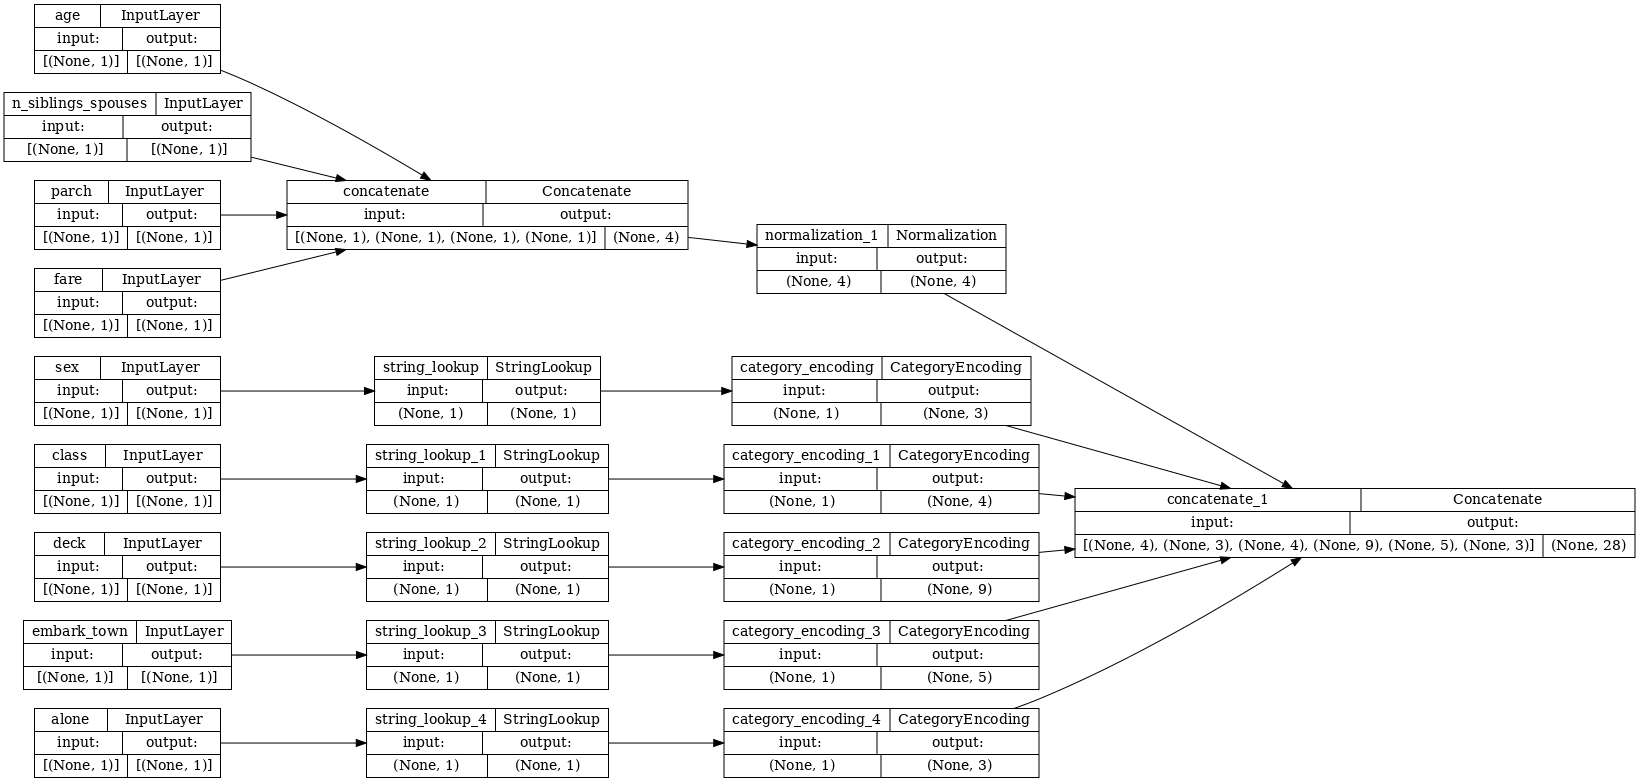

In [20]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

이 모델은 입력 전처리만 포함합니다. 이를 실행하여 데이터에 어떤 영향을 미치는지 확인할 수 있습니다. Keras 모델은 Pandas <code>DataFrames</code>를 자동으로 변환하지 않습니다. 왜냐하면 하나의 텐서로 변환해야 하는지 아니면 텐서 사전으로 변환해야 하는지가 명확하지 않기 때문입니다. 따라서 이를 텐서 사전으로 변환합니다.

In [21]:
titanic_features_dict = {name: np.array(value) 
                         for name, value in titanic_features.items()}

첫 번째 훈련 예제를 잘라서 이 전처리 모델로 전달하면 숫자 특성과 문자열 원-핫이 모두 함께 연결된 것을 볼 수 있습니다.

In [22]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

이제 이 위에 모델을 빌드합니다.

In [23]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

모델을 훈련할 때 특성 사전을 `x`로, 레이블을 `y`로 전달합니다.

In [24]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10


 1/20 [>.............................] - ETA: 22s - loss: 0.6991

13/20 [==================>...........] - ETA: 0s - loss: 0.5924 

20/20 [==============================] - 1s 5ms/step - loss: 0.5686


Epoch 2/10


 1/20 [>.............................] - ETA: 0s - loss: 0.6472

13/20 [==================>...........] - ETA: 0s - loss: 0.5246

20/20 [==============================] - 0s 4ms/step - loss: 0.5040


Epoch 3/10


 1/20 [>.............................] - ETA: 0s - loss: 0.4836

14/20 [====================>.........] - ETA: 0s - loss: 0.4718

20/20 [==============================] - 0s 4ms/step - loss: 0.4742


Epoch 4/10


 1/20 [>.............................] - ETA: 0s - loss: 0.3842

13/20 [==================>...........] - ETA: 0s - loss: 0.4375

20/20 [==============================] - 0s 4ms/step - loss: 0.4549


Epoch 5/10


 1/20 [>.............................] - ETA: 0s - loss: 0.6322

13/20 [==================>...........] - ETA: 0s - loss: 0.4425

20/20 [==============================] - 0s 4ms/step - loss: 0.4436


Epoch 6/10


 1/20 [>.............................] - ETA: 0s - loss: 0.3895

14/20 [====================>.........] - ETA: 0s - loss: 0.4203

20/20 [==============================] - 0s 4ms/step - loss: 0.4349


Epoch 7/10


 1/20 [>.............................] - ETA: 0s - loss: 0.3454

14/20 [====================>.........] - ETA: 0s - loss: 0.4434

20/20 [==============================] - 0s 4ms/step - loss: 0.4297


Epoch 8/10


 1/20 [>.............................] - ETA: 0s - loss: 0.4162

13/20 [==================>...........] - ETA: 0s - loss: 0.4326

20/20 [==============================] - 0s 4ms/step - loss: 0.4266


Epoch 9/10


 1/20 [>.............................] - ETA: 0s - loss: 0.4274

13/20 [==================>...........] - ETA: 0s - loss: 0.4350

20/20 [==============================] - 0s 4ms/step - loss: 0.4252


Epoch 10/10


 1/20 [>.............................] - ETA: 0s - loss: 0.3639

14/20 [====================>.........] - ETA: 0s - loss: 0.4104

20/20 [==============================] - 0s 4ms/step - loss: 0.4230


전처리는 모델의 일부이므로 모델을 저장하고 다른 곳에 다시 로드하여도 동일한 결과를 얻을 수 있습니다.

In [25]:
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

INFO:tensorflow:Assets written to: test/assets


In [26]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.923]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.923]], shape=(1, 1), dtype=float32)


## tf.data 사용하기


이전 섹션에서는 모델을 훈련하는 동안 모델의 내장 데이터 셔플링 및 배치에 의존했습니다.

입력 데이터 파이프라인을 더 많이 제어해야 하거나 메모리에 쉽게 맞출 수 없는 데이터를 사용해야 하는 경우 `tf.data`를 사용합니다.

더 많은 예를 보려면 [`tf.data`: TensorFlow 입력 파이프라인 빌드](../../guide/data.ipynb) 가이드를 참조하세요.

### 인메모리 데이터에서

CSV 데이터에 `tf.data`를 적용하는 첫 번째 예제로 다음 코드를 고려할 경우 이전 섹션의 특성 사전을 수동으로 분할합니다. 각 인덱스에는 각 특성에 대해 이러한 인덱스를 사용합니다.


In [27]:
import itertools

def slices(features):
  for i in itertools.count():
    # For each feature take index `i`
    example = {name:values[i] for name, values in features.items()}
    yield example

이것을 실행하고 첫 번째 예제를 출력합니다.

In [28]:
for example in slices(titanic_features_dict):
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


메모리 데이터 로더에서 가장 기본적인 `tf.data.Dataset`은 `Dataset.from_tensor_slices` 생성자입니다. 이것은 TensorFlow에서 위의 `slices` 함수의 일반화된 버전을 구현하는 `tf.data.Dataset`를 반환합니다.

In [29]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

다른 Python iterable과 마찬가지로 `tf.data.Dataset`에 대해 반복할 수 있습니다.

In [30]:
for example in features_ds:
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


`from_tensor_slices` 함수는 모든 구조의 중첩된 사전 또는 튜플을 처리할 수 있습니다. 다음 코드는 `(features_dict, labels)` 쌍의 데이터세트를 만듭니다.

In [31]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

이 `Dataset`를 사용하여 모델을 훈련하려면 최소한 데이터를 `shuffle`하고 `batch` 처리해야 합니다.

In [32]:
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

`features` 및 `labels`를 `Model.fit`에 전달하는 대신 데이터세트를 전달합니다.

In [33]:
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5


 1/20 [>.............................] - ETA: 8s - loss: 0.4248

13/20 [==================>...........] - ETA: 0s - loss: 0.4374

20/20 [==============================] - 1s 4ms/step - loss: 0.4216


Epoch 2/5


 1/20 [>.............................] - ETA: 0s - loss: 0.4226

13/20 [==================>...........] - ETA: 0s - loss: 0.4476

20/20 [==============================] - 0s 4ms/step - loss: 0.4205


Epoch 3/5


 1/20 [>.............................] - ETA: 0s - loss: 0.3747

13/20 [==================>...........] - ETA: 0s - loss: 0.3898

20/20 [==============================] - 0s 4ms/step - loss: 0.4214


Epoch 4/5


 1/20 [>.............................] - ETA: 0s - loss: 0.4503

13/20 [==================>...........] - ETA: 0s - loss: 0.4247

20/20 [==============================] - 0s 4ms/step - loss: 0.4193


Epoch 5/5


 1/20 [>.............................] - ETA: 0s - loss: 0.3207

13/20 [==================>...........] - ETA: 0s - loss: 0.4287

20/20 [==============================] - 0s 4ms/step - loss: 0.4196


### 단일 파일로부터

지금까지 이 튜토리얼은 인메모리 데이터로 작업했습니다. `tf.data`는 데이터 파이프라인을 빌드하기 위한 확장성이 뛰어난 툴킷이며 CSV 파일 로드를 처리하는 몇 가지 기능을 제공합니다. 

In [34]:
titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

 8192/30874 [======>.......................] - ETA: 0s

30874/30874 [==============================] - 0s 0us/step


이제 파일에서 CSV 데이터를 읽고 `tf.data.Dataset`를 작성합니다.

(전체 설명서는 `tf.data.experimental.make_csv_dataset`를 참조하세요.)


In [35]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, # Artificially small to make examples easier to show.
    label_name='survived',
    num_epochs=1,
    ignore_errors=True,)

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


이 함수에는 많은 편리한 특성이 포함되어 있어 데이터 작업이 용이합니다. 여기에는 다음이 포함되어 있습니다.

- 열 헤더를 사전 키로 사용.
- 각 열의 유형을 자동으로 결정.

주의: `tf.data.experimental.make_csv_dataset`에서 `num_epochs` 인수를 설정해야 합니다. 그렇지 않으면 `tf.data.Dataset`의 기본 동작은 루프를 무한히 반복하는 것입니다.

In [36]:
for batch, label in titanic_csv_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value}")
  print()
  print(f"{'label':20s}: {label}")

sex                 : [b'male' b'female' b'male' b'female' b'male']
age                 : [26. 42. 32. 21. 46.]
n_siblings_spouses  : [0 0 0 0 0]
parch               : [0 0 0 0 0]
fare                : [ 8.05 13.    8.05  7.75 79.2 ]
class               : [b'Third' b'Second' b'Third' b'Third' b'First']
deck                : [b'unknown' b'unknown' b'E' b'unknown' b'B']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Queenstown' b'Cherbourg']
alone               : [b'y' b'y' b'y' b'y' b'y']

label               : [0 1 1 0 0]


참고: 위의 셀을 두 번 실행하면 다른 결과가 생성됩니다. `tf.data.experimental.make_csv_dataset`의 기본 설정에는 `shuffle_buffer_size=1000`이 포함되며, 이는 이 작은 데이터세트에는 충분하지만 실제 데이터세트에는 그렇지 않을 수 있습니다.

즉시 데이터 압축을 풀 수도 있습니다. 다음은 [대도시 주간 교통량 데이터세트](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)가 포함된 gzip으로 압축된 CSV 파일입니다.

![교통 정체.](images/csv/traffic.jpg)

이미지 출처: [Wikimedia](https://commons.wikimedia.org/wiki/File:Trafficjam.jpg)


In [37]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz', 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='traffic')

  8192/405373 [..............................] - ETA: 0s

 81920/405373 [=====>........................] - ETA: 0s

385024/405373 [===========================>..] - ETA: 0s

405373/405373 [==============================] - 0s 0us/step


압축된 파일로부터 직접 읽도록 `compression_type` 인수를 설정합니다.

In [38]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type="GZIP")

for batch, label in traffic_volume_csv_gz_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value[:5]}")
  print()
  print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [267.84 285.35 266.41 280.66 279.53]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [90 32 90 90  1]
weather_main        : [b'Snow' b'Clouds' b'Snow' b'Mist' b'Clear']
weather_description : [b'heavy snow' b'scattered clouds' b'heavy snow' b'mist' b'sky is clear']
date_time           : [b'2013-03-19 12:00:00' b'2013-07-29 02:00:00' b'2013-01-03 22:00:00'
 b'2013-05-23 07:00:00' b'2013-04-04 15:00:00']

label               : [4755  324 1550 6717 5992]


참고: `tf.data` 파이프라인에서 해당 날짜-시간 문자열을 파싱해야 하는 경우 `tfa.text.parse_time`을 사용할 수 있습니다.

### 캐싱

CSV 데이터를 파싱하는 데 약간의 오버헤드가 있습니다. 작은 크기의 모델의 경우 이때 훈련 병목 현상이 발생할 수 있습니다.

사용 사례에 따라 CSV 데이터가 첫 번째 epoch에서만 파싱되도록 `Dataset.cache` 또는 `tf.data.experimental.snapshot`을 사용하는 것이 좋습니다.

`cache`와 `snapshot` 메서드의 주요 차이점은 `cache` 파일은 이를 생성한 TensorFlow 프로세스에서만 사용할 수 있다는 것입니다. 다만, `snapshot` 파일은 다른 프로세스에서 읽을 수 있습니다.

예를 들어, `traffic_volume_csv_gz_ds`를 20번 반복하는 데 캐싱 없이는 약 15초, 캐싱이 있으면 약 2초가 걸릴 수 있습니다.

In [39]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

..

..

..

..

..

..

..

.

..

..

..

..

..

..

..

..

..

.

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

..

.
CPU times: user 17.7 s, sys: 3.98 s, total: 21.6 s
Wall time: 13 s


참고: `Dataset.cache`는 첫 번째 epoch의 데이터를 저장하고 순서대로 재생합니다. 따라서 `cache` 메서드를 사용하면 파이프라인의 초기에 모든 셔플이 비활성화됩니다. 아래에서 `Dataset.shuffle`은 `Dataset.cache` 뒤에 다시 추가됩니다.

In [40]:
%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

..................

..................

.................

..................

..................

......
CPU times: user 1.98 s, sys: 293 ms, total: 2.27 s
Wall time: 1.78 s


참고: `tf.data.experimental.snapshot` 파일은 사용 중 데이터세트를 *임시로* 저장하기 위한 것입니다. 이것은 장기 보관을 위한 형식이 *아닙니다*. 파일 형식은 내부 정보로 간주되며 TensorFlow 버전 간에 보장되지 않습니다.

In [41]:
%%time
snapshot = tf.data.experimental.snapshot('titanic.tfsnap')
snapshotting = traffic_volume_csv_gz_ds.apply(snapshot).shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

Instructions for updating:
Use `tf.data.Dataset.snapshot(...)`.


..............

..............

................

................

................

.................

..
CPU times: user 3.03 s, sys: 814 ms, total: 3.84 s
Wall time: 2.06 s


CSV 파일 로드로 인해 데이터 로드가 느려지고 `Dataset.cache` 및 `tf.data.experimental.snapshot`이 사용 사례에 충분하지 않은 경우, 데이터를 보다 간소화된 형식으로 다시 인코딩하는 것이 좋습니다.

### 여러 파일

지금까지 이 섹션의 모든 예제는 `tf.data` 없이 쉽게 수행할 수 있었습니다. `tf.data`를 사용하여 실제로 작업을 단순화할 수 있는 한 예는 파일 모음을 처리할 경우입니다.

예를 들어 [문자 글꼴 이미지](https://archive.ics.uci.edu/ml/datasets/Character+Font+Images) 데이터세트는 글꼴당 하나씩, csv 파일 모음으로 배포됩니다.

![글꼴](images/csv/fonts.jpg)

<a href="https://pixabay.com/users/wilhei-883152/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=705667">Pixabay</a>에서 <a href="https://pixabay.com/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=705667">Willi Heidelbach</a>가 제공한 이미지

데이터세트를 다운로드하고 내부 파일을 검토합니다.

In [42]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip',  "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='.', cache_subdir='fonts',
    extract=True)

     8192/160313983 [..............................] - ETA: 0s

    81920/160313983 [..............................] - ETA: 3:12

   229376/160313983 [..............................] - ETA: 1:43

   540672/160313983 [..............................] - ETA: 58s 

   991232/160313983 [..............................] - ETA: 39s

  1769472/160313983 [..............................] - ETA: 26s

  3211264/160313983 [..............................] - ETA: 17s

  5963776/160313983 [>.............................] - ETA: 10s

  9043968/160313983 [>.............................] - ETA: 7s 

 12173312/160313983 [=>............................] - ETA: 6s

 15286272/160313983 [=>............................] - ETA: 5s

 18415616/160313983 [==>...........................] - ETA: 4s

 21495808/160313983 [===>..........................] - ETA: 4s

 24641536/160313983 [===>..........................] - ETA: 3s

 27770880/160313983 [====>.........................] - ETA: 3s

 30793728/160313983 [====>.........................] - ETA: 3s

 33923072/160313983 [=====>........................] - ETA: 3s

 37036032/160313983 [=====>........................] - ETA: 3s

 39862272/160313983 [======>.......................] - ETA: 2s

 42975232/160313983 [=======>......................] - ETA: 2s

 46104576/160313983 [=======>......................] - ETA: 2s

 49201152/160313983 [========>.....................] - ETA: 2s

 52322304/160313983 [========>.....................] - ETA: 2s

 55435264/160313983 [=========>....................] - ETA: 2s

 58548224/160313983 [=========>....................] - ETA: 2s

 61677568/160313983 [==========>...................] - ETA: 2s

 64806912/160313983 [===========>..................] - ETA: 2s

 67952640/160313983 [===========>..................] - ETA: 1s

 71081984/160313983 [============>.................] - ETA: 1s

 74227712/160313983 [============>.................] - ETA: 1s

 77201408/160313983 [=============>................] - ETA: 1s

 80027648/160313983 [=============>................] - ETA: 1s

 82886656/160313983 [==============>...............] - ETA: 1s

 85671936/160313983 [===============>..............] - ETA: 1s

 88465408/160313983 [===============>..............] - ETA: 1s

 91414528/160313983 [================>.............] - ETA: 1s

 94535680/160313983 [================>.............] - ETA: 1s

 97665024/160313983 [=================>............] - ETA: 1s

100810752/160313983 [=================>............] - ETA: 1s

103940096/160313983 [==================>...........] - ETA: 1s

107069440/160313983 [===================>..........] - ETA: 1s

110198784/160313983 [===================>..........] - ETA: 0s

113328128/160313983 [====================>.........] - ETA: 0s

116457472/160313983 [====================>.........] - ETA: 0s

119586816/160313983 [=====================>........] - ETA: 0s

122732544/160313983 [=====================>........] - ETA: 0s

125837312/160313983 [======================>.......] - ETA: 0s

128942080/160313983 [=======================>......] - ETA: 0s

132005888/160313983 [=======================>......] - ETA: 0s

134856704/160313983 [========================>.....] - ETA: 0s

137674752/160313983 [========================>.....] - ETA: 0s

140500992/160313983 [=========================>....] - ETA: 0s

143343616/160313983 [=========================>....] - ETA: 0s

146448384/160313983 [==========================>...] - ETA: 0s

149553152/160313983 [==========================>...] - ETA: 0s

152682496/160313983 [===========================>..] - ETA: 0s

155811840/160313983 [============================>.] - ETA: 0s

158941184/160313983 [============================>.] - ETA: 0s

160313983/160313983 [==============================] - 3s 0us/step


In [43]:
import pathlib
font_csvs =  sorted(str(p) for p in pathlib.Path('fonts').glob("*.csv"))

font_csvs[:10]

['fonts/AGENCY.csv',
 'fonts/ARIAL.csv',
 'fonts/BAITI.csv',
 'fonts/BANKGOTHIC.csv',
 'fonts/BASKERVILLE.csv',
 'fonts/BAUHAUS.csv',
 'fonts/BELL.csv',
 'fonts/BERLIN.csv',
 'fonts/BERNARD.csv',
 'fonts/BITSTREAMVERA.csv']

In [44]:
len(font_csvs)

153

많은 파일을 처리할 경우 glob 스타일의 `file_pattern`을 `tf.data.experimental.make_csv_dataset` 함수에 전달할 수 있습니다. 파일의 순서는 각 반복마다 뒤섞입니다.

`num_parallel_reads` 인수를 사용하여 병렬로 읽고 함께 인터리브 처리되는 파일의 수를 설정합니다.

In [45]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=10, num_epochs=1,
    num_parallel_reads=20,
    shuffle_buffer_size=10000)

이러한 CSV 파일의 이미지는 단일 행으로 평면화되어 있습니다. 열 이름의 형식은 `r{row}c{column}`입니다. 다음은 첫 번째 배치입니다.

In [46]:
for features in fonts_ds.take(1):
  for i, (name, value) in enumerate(features.items()):
    if i>15:
      break
    print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

font                : [b'BOOK' b'BOOK' b'BASKERVILLE' b'BASKERVILLE' b'PANROMAN'
 b'CITYBLUEPRINT' b'MAGNETO' b'HIMALAYA' b'VLADIMIR' b'BOOK']
fontVariant         : [b'BOOK ANTIQUA' b'BOOK ANTIQUA' b'BASKERVILLE OLD FACE'
 b'BASKERVILLE OLD FACE' b'PANROMAN' b'CITYBLUEPRINT' b'MAGNETO'
 b'MICROSOFT HIMALAYA' b'VLADIMIR SCRIPT' b'BOOK ANTIQUA']
m_label             : [ 1045  8211   181   214  8230 61498   180   126    66  8595]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic              : [0 0 0 1 0 0 0 0 0 0]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [38 66 48 22 20 60 45 45 33 36]
m_left              : [21 22 19 30 24 26 38 20 25 25]
originalH           : [46  5 44 58 55 31 10  6 49 62]
originalW           : [38 29 32 50 25  2 14 24 58 23]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [222   1   1   1 255 255   1   1   1   1]
r0c1                

...
[total: 412 features]


#### 선택 사항: 패킹 필드

여러분은 아마도 이와 같이 별도의 열에 있는 각 픽셀로 작업하고 싶지는 않을 것입니다. 이 데이터세트를 사용하기 전에 픽셀을 이미지 텐서로 패킹해야 합니다.

다음은 각 예제의 이미지를 빌드하기 위해 열 이름을 파싱하는 코드입니다.

In [47]:
import re

def make_images(features):
  image = [None]*400
  new_feats = {}

  for name, value in features.items():
    match = re.match('r(\d+)c(\d+)', name)
    if match:
      image[int(match.group(1))*20+int(match.group(2))] = value
    else:
      new_feats[name] = value

  image = tf.stack(image, axis=0)
  image = tf.reshape(image, [20, 20, -1])
  new_feats['image'] = image

  return new_feats

데이터세트의 각 배치에 해당 함수를 적용합니다.

In [48]:
fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
  break

결과 이미지를 플롯합니다.

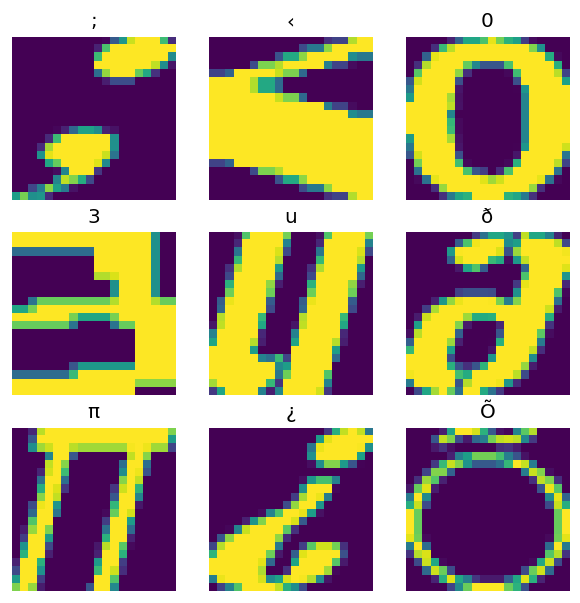

In [49]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6), dpi=120)

for n in range(9):
  plt.subplot(3,3,n+1)
  plt.imshow(features['image'][..., n])
  plt.title(chr(features['m_label'][n]))
  plt.axis('off')

## 하위 수준 함수

지금까지 이 튜토리얼은 csv 데이터를 읽기 위한 가장 높은 수준의 유틸리티에 중점을 두었습니다. 사용 사례가 이 기본 패턴에 맞지 않는 경우 고급 사용자에게 도움이 될 수 있는 다른 두 가지 API가 있습니다.

- `tf.io.decode_csv`: 텍스트 줄을 CSV 열 텐서 목록으로 파싱하는 함수입니다.
- `tf.data.experimental.CsvDataset`: 하위 수준 CSV 데이터세트 생성자입니다.

이 섹션에서는 `tf.data.experimental.make_csv_dataset`에서 제공하는 기능을 다시 만들어 이 하위 수준 기능을 사용하는 방법을 보여줍니다.


### `tf.io.decode_csv`

이 함수는 문자열 또는 문자열 목록을 열 목록으로 디코딩합니다.

`tf.data.experimental.make_csv_dataset`과 달리 이 함수는 열 데이터 유형을 추측하지 않습니다. 각 열에 대해 올바른 유형의 값이 포함된 `record_defaults` 목록을 제공하여 열 유형을 지정합니다.

`tf.io.decode_csv`를 사용하여 타이타닉 데이터를 **문자열로** 읽기 위해 다음과 같이 할 수 있습니다.

In [50]:
text = pathlib.Path(titanic_file_path).read_text()
lines = text.split('\n')[1:-1]

all_strings = [str()]*10
all_strings

['', '', '', '', '', '', '', '', '', '']

In [51]:
features = tf.io.decode_csv(lines, record_defaults=all_strings) 

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


실제 유형으로 파싱하려면 해당 유형의 `record_defaults` 목록을 만듭니다. 

In [52]:
print(lines[0])

0,male,22.0,1,0,7.25,Third,unknown,Southampton,n


In [53]:
titanic_types = [int(), str(), float(), int(), int(), float(), str(), str(), str(), str()]
titanic_types

[0, '', 0.0, 0, 0, 0.0, '', '', '', '']

In [54]:
features = tf.io.decode_csv(lines, record_defaults=titanic_types) 

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: int32, shape: (627,)
type: string, shape: (627,)
type: float32, shape: (627,)
type: int32, shape: (627,)
type: int32, shape: (627,)
type: float32, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


참고: CSV 텍스트의 개별 라인보다 대형 라인 배치에서 `tf.io.decode_csv`를 호출하는 것이 더 효율적입니다.

### `tf.data.experimental.CsvDataset`

`tf.data.experimental.CsvDataset` 클래스는 `tf.data.experimental.make_csv_dataset` 함수의 편리한 특성인 열 헤더 파싱, 열 유형 추론, 자동 셔플링, 파일 인터리빙 없이 최소한의 CSV `Dataset` 인터페이스를 제공합니다.

이 생성자는 `tf.io.decode_csv`와 같은 방식으로 `record_defaults`를 사용합니다.


In [55]:
simple_titanic = tf.data.experimental.CsvDataset(titanic_file_path, record_defaults=titanic_types, header=True)

for example in simple_titanic.take(1):
  print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


위의 코드는 기본적으로 다음과 같습니다.

In [56]:
def decode_titanic_line(line):
  return tf.io.decode_csv(line, titanic_types)

manual_titanic = (
    # Load the lines of text
    tf.data.TextLineDataset(titanic_file_path)
    # Skip the header row.
    .skip(1)
    # Decode the line.
    .map(decode_titanic_line)
)

for example in manual_titanic.take(1):
  print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


#### 여러 파일

`tf.data.experimental.CsvDataset`을 사용하여 글꼴 데이터세트를 파싱하려면 먼저 `record_defaults`에 대한 열 유형을 결정해야 합니다. 우선 한 파일의 첫 번째 행을 검사합니다.

In [57]:
font_line = pathlib.Path(font_csvs[0]).read_text().splitlines()[1]
print(font_line)

AGENCY,AGENCY FB,64258,0.400000,0,0.000000,35,21,51,22,20,20,1,1,1,21,101,210,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,93,255,255,255,176,146,146,146,146,146,146,146,146,216,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,141,141,141,182,255,255,255,172,141,141,141,115,1,1,1,1,163,255,255,255,255,255,255,255,255,255,255,255,255,255,255,209,1,1,1,1,163,255,255,255,6,6,6,96,255,255,255,74,6,6,6,5,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1

처음 두 개의 필드만 문자열이고 나머지는 정수 또는 부동 소수점이며 쉼표를 계산하여 총 특성 수를 얻을 수 있습니다.

In [58]:
num_font_features = font_line.count(',')+1
font_column_types = [str(), str()] + [float()]*(num_font_features-2)

`tf.data.experimental.CsvDataset` 생성자는 입력 파일 목록을 가져올 수 있지만 순차적으로 읽습니다. CSV 목록의 첫 번째 파일은 `AGENCY.csv`입니다.

In [59]:
font_csvs[0]

'fonts/AGENCY.csv'

따라서 파일 목록을 `CsvDataset`에 전달할 때 `AGENCY.csv`의 레코드를 먼저 읽습니다.

In [60]:
simple_font_ds = tf.data.experimental.CsvDataset(
    font_csvs, 
    record_defaults=font_column_types, 
    header=True)

In [61]:
for row in simple_font_ds.take(10):
  print(row[0].numpy())

b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'


여러 파일을 인터리브하려면 `Dataset.interleave`를 사용합니다.

CSV 파일 이름이 포함된 초기 데이터세트는 다음과 같습니다. 

In [62]:
font_files = tf.data.Dataset.list_files("fonts/*.csv")

이렇게 하면 각 epoch마다 파일 이름을 셔플합니다.

In [63]:
print('Epoch 1:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')
print()

print('Epoch 2:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')

Epoch 1:


     b'fonts/VIN.csv'
     b'fonts/KRISTEN.csv'
     b'fonts/SKETCHFLOW.csv'
     b'fonts/CONSTANTIA.csv'
     b'fonts/PALACE.csv'
    ...

Epoch 2:


     b'fonts/VERDANA.csv'
     b'fonts/SERIF.csv'
     b'fonts/FRENCH.csv'
     b'fonts/MATURA.csv'
     b'fonts/TECHNIC.csv'
    ...


`interleave` 메서드는 상위 `Dataset`의 각 요소마다 하위 `Dataset`를 생성하는 `map_func`를 사용합니다.

여기에서 파일 데이터세트의 각 요소에서 `tf.data.experimental.CsvDataset`을 생성하려고 합니다.

In [64]:
def make_font_csv_ds(path):
  return tf.data.experimental.CsvDataset(
    path, 
    record_defaults=font_column_types, 
    header=True)

인터리브로 반환한 `Dataset`는 여러 하위 `Dataset`를 순환하며 요소를 반환합니다. 아래에서 데이터세트가 `cycle_length=3` 세 가지 글꼴 파일을 순환하는 방식을 확인하세요.

In [65]:
font_rows = font_files.interleave(make_font_csv_ds,
                                  cycle_length=3)

In [66]:
fonts_dict = {'font_name':[], 'character':[]}

for row in font_rows.take(10):
  fonts_dict['font_name'].append(row[0].numpy().decode())
  fonts_dict['character'].append(chr(row[2].numpy()))

pd.DataFrame(fonts_dict)

/tmpfs/tmp/ipykernel_659720/998453860.py:5: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  fonts_dict['character'].append(chr(row[2].numpy()))


,font_name,character
0,BRITANNIC,
1,CENTURY,ﬂ
2,ONYX,
3,BRITANNIC,
4,CENTURY,ﬁ
5,ONYX,
6,BRITANNIC,◊
7,CENTURY,
8,ONYX,
9,BRITANNIC,≥


#### 공연


이전에 `tf.io.decode_csv`가 문자열 배치에서 실행될 때 더 효율적이라는 점을 언급했습니다.

대형 배치 크기를 사용할 때 이 사실을 활용하여 CSV 로드 성능을 향상시킬 수 있습니다(단, 먼저 [캐싱](#caching)을 시도해야 함).

내장 로더 20을 사용할 경우 2048개의 예제 배치에 약 17초가 걸립니다. 

In [67]:
BATCH_SIZE=2048
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=BATCH_SIZE, num_epochs=1,
    num_parallel_reads=100)

In [68]:
%%time
for i,batch in enumerate(fonts_ds.take(20)):
  print('.',end='')

print()

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


CPU times: user 52.7 s, sys: 5.52 s, total: 58.2 s
Wall time: 22.2 s


**텍스트 줄 배치**를 `decode_csv`에 전달하면 더 빠르게 약 5초 만에 실행됩니다.

In [69]:
fonts_files = tf.data.Dataset.list_files("fonts/*.csv")
fonts_lines = fonts_files.interleave(
    lambda fname:tf.data.TextLineDataset(fname).skip(1), 
    cycle_length=100).batch(BATCH_SIZE)

fonts_fast = fonts_lines.map(lambda x: tf.io.decode_csv(x, record_defaults=font_column_types))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [70]:
%%time
for i,batch in enumerate(fonts_fast.take(20)):
  print('.',end='')

print()

....................


CPU times: user 5.12 s, sys: 65.2 ms, total: 5.18 s
Wall time: 842 ms


대규모 배치를 사용하여 CSV 성능을 높이는 또 다른 예는 [과대적합과 과소적합 튜토리얼](../keras/overfit_and_underfit.ipynb)을 참조하세요.

이러한 종류의 접근 방식이 효과가 있을 수 있지만 `Dataset.cache` 및 `tf.data.experimental.snapshot`과 같은 다른 옵션과 함께 데이터를 보다 간소화된 형식으로 다시 인코딩하는 방법도 고려하세요.